<a href="https://colab.research.google.com/github/kundajelab/adar_editing/blob/master/xgboost_with_shap/CROSS_SUBSTRATE_TRAINING_XGBOOST_WITH_TREESHAP_TRAIN_NEIL1_PREDICT_OTHERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install numpy==1.15


In [0]:

## Uncomment these lines if running as a google colab notebook: 
! git clone https://github.com/kundajelab/adar_editing
import os
os.chdir("adar_editing/xgboost_with_shap/")
!pip install shap
!pip install --upgrade xgboost
!pip install cufflinks


In [0]:
%load_ext autoreload
%autoreload 2   

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))


In [0]:
#helper utilities for model training and interpretation 
import shap
from helpers import * 

#set a random seed so code is reproducible 
random.seed(1234)

# load JS visualization code to notebook
shap.initjs()
import warnings
warnings.filterwarnings('ignore')

#visualization utilities 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.plotly as py
import numpy as np
from plotly.offline import iplot
from plotly.graph_objs import Heatmap


In [0]:
## Load all the datasets : TTYH2
ttyh2_comp=pd.read_csv("../xin_feature_matrices/ttyh2_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
ttyh2_comp=ttyh2_comp[~ttyh2_comp["editing_value"].isnull().values]
ttyh2_comp=format_for_xgboost(ttyh2_comp)

(601, 216)


In [0]:
## Load all the datasets: NEIL1
neil1_comp=pd.read_csv("../xin_feature_matrices/neil1_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
neil1_comp=neil1_comp[~neil1_comp["editing_value"].isnull().values]
neil1_comp=format_for_xgboost(neil1_comp)

(428, 219)


In [0]:
## Load all the dtasets: AJUBA
ajuba_comp=pd.read_csv("../xin_feature_matrices/ajuba_bc_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
ajuba_comp=ajuba_comp[~ajuba_comp["editing_value"].isnull().values]
ajuba_comp=format_for_xgboost(ajuba_comp)

(482, 186)


In [0]:
train_split,eval_split=split_train_eval_by_mut_pos(neil1_comp[~neil1_comp['mut_pos'].isna()])
null_mut_pos=train_split[train_split['mut_pos'].isna()]
train_split=pd.concat((train_split,null_mut_pos),axis=0)

{20.0: 3, 21.0: 3, 22.0: 3, 23.0: 4, 24.0: 3, 25.0: 4, 26.0: 3, 27.0: 4, 28.0: 4, 29.0: 4, 30.0: 3, 31.0: 4, 32.0: 4, 33.0: 4, 34.0: 4, 35.0: 4, 36.0: 4, 41.0: 20, 42.0: 21, 43.0: 18, 44.0: 18, 45.0: 20, 46.0: 19, 48.0: 20, 49.0: 21, 50.0: 21, 51.0: 20, 52.0: 20, 53.0: 21, 54.0: 19, 55.0: 21, 56.0: 20, 57.0: 15, 58.0: 31}


## Train NEIL1, predict TTYH2

In [0]:
test_split=ttyh2_comp

In [0]:
train_split.reset_index(inplace=True, drop=True) 
eval_split.reset_index(inplace=True,drop=True)
test_split.reset_index(inplace=True,drop=True)

In [0]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [0]:
#Remove any null features 
train_null=get_all_null_features(train_split)
eval_null=get_all_null_features(eval_split)
test_null=get_all_null_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [0]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
print("\n".join(to_drop))

d3_length_bulge
site_5prm_cp_bulge:G:U
mut_same_as_site
u1_length_internal_ecs
site_prev_struct:H
d2_struct:S
u3_length_internal_es
site_next_nt:C
site_next_struct:S
u1_length_internal_es
u2_3prm_cp_bulge:U:A
u2_5prm_cp_hairpin:U:G
d2_5prm_cp_bulge:U:G
d2_struct:H
d2_5prm_cp_bulge:A:U
mut_type:indel
d1_exist
u2_5prm_cp_hairpin:U:A
u3_length_internal_ecs
u_hairpin_length
d2_5prm_cp_hairpin
d1_5prm_cp_internal:U:A
d2_3prm_cp_bulge:G:U
d3_length_hairpin
u3_5prm_cp_bulge:C:G
d3_3prm_cp_internal:G:C
d2_3prm_cp_bulge:U:A
u2_length_internal_ecs
d1_5prm_cp_hairpin
d2_length_stem
u1_struct:H
mut_ref_struct:I
d1_3prm_cp_internal:G:C
d3_5prm_cp_internal:G:C
d1_struct:S
d1_length_hairpin
d2_3prm_cp_internal:G:U
u1_3prm_cp_internal
site_prev_struct:B
d3_exist
mut_ref_struct:B
d3_struct:I
u1_3prm_cp_bulge:A:U
d1_length_internal_ecs
u1_length_hairpin
site_5prm_cp_hairpin:G:C
d1_3prm_cp_internal:C:G
site_length_hairpin
u2_5prm_cp_bulge:U:A
d1_3prm_cp_bulge
d2_length_hairpin
u1_5prm_cp_internal
mut_ref

In [0]:
#remove teh features that don't change across isoforms , or are null for all isoforms
for cur_to_drop in to_drop: 
    try:
        train_split=train_split.drop(cur_to_drop,axis=1)
    except: 
        pass
    try:
        eval_split=eval_split.drop(cur_to_drop,axis=1)
    except: 
        pass 
    try:
        test_split=test_split.drop(to_drop,axis=1)
    except: 
        pass

In [0]:

train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)
eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)
test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [0]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

(320, 119)
(320,)
(71, 119)
(71,)
(601, 215)
(601,)


In [0]:
train_cols=set(train_X.columns)
eval_cols=set(eval_X.columns)
test_cols=set(test_X.columns)

In [0]:
common=train_cols.intersection(eval_cols)
common=list(common.intersection(test_cols))
print(common)
train_X=train_X[common]
eval_X=eval_X[common]
test_X=test_X[common]
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

['mut_ref_nt:G', 'u3_distance', 'd2_3prm_cp_internal:C:G', 'site_3prm_cp_internal:G:C', 'site_length_internal_es', 'd2_distance', 'd2_3prm_cp_bulge:C:G', 'mut_pos', 'u3_struct:H', 'u2_3prm_cp_bulge:G:C', 'all_stem_length', 'site_prev_nt:U', 'sim_nor_score', 'u1_struct:S', 'u3_length_stem', 'd_count', 'site_next_nt:U', 'u2_length', 'mut_site_dist', 'd2_struct:I', 'u3_length', 'd2_3prm_cp_internal:G:C', 'mut_ref_nt:C', 'mut_nt:U', 'u2_length_bulge', 'mut_nt:G', 'd2_3prm_cp_internal:U:A', 'u2_struct:B', 'free_energy', 'mut_ref_nt:A', 'mut_struct:S', 'u3_3prm_cp_bulge:G:C', 'u3_3prm_cp_bulge:C:G', 'd2_5prm_cp_internal:G:C', 'mut_prev_struct:H', 'd1_distance', 'site_3prm_cp_internal:G:U', 'u2_5prm_cp_bulge:C:G', 'u3_length_bulge', 'site_5prm_cp_bulge:C:G', 'site_5prm_cp_internal:G:C', 'u2_5prm_cp_bulge:G:U', 'site_next_nt:A', 'd3_distance', 'mut_prev_struct:S', 'u_count', 'u1_length_stem', 'mut_next_struct:I', 'd_all_stem_length', 'mut_nt:C', 'probability_active_conf', 'u2_3prm_cp_bulge:C:G

In [0]:
## format matrixes for xgboost 
import xgboost
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [0]:
## set model training parameters 
from __future__ import unicode_literals
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 

#Note: the last metric in your 'eval_metric' list will get optimized 
param['eval_metric'] = ['aucpr','auc','mae','map','rmse']

In [0]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [0]:
num_round = 1000
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[10:17:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[0]	eval-aucpr:0.512329	eval-auc:0.75798	eval-mae:0.207391	eval-map:1	eval-rmse:0.235474	train-aucpr:0.568509	train-auc:0.818235	train-mae:0.208018	train-map:1	train-rmse:0.244401
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[10:17:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[1]	eval-aucpr:0.518559	eval-auc:0.764433	eval-mae:0.159269	eval-map:1	eval-rmse:0.181096	train-aucpr:0.579068	train-auc:0.823184	train-mae:0.152239	train-map:1	train-rmse:0.178769
[10:17:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[2]	eval-aucpr:0.520122	eval-auc:0.767376	eval-mae:0.12835	eval-map:1	eval-rmse:0.148531	train-aucpr:0.581101	train-auc:0.825

[10:17:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[27]	eval-aucpr:0.537859	eval-auc:0.790238	eval-mae:0.062693	eval-map:1	eval-rmse:0.093821	train-aucpr:0.597426	train-auc:0.842766	train-mae:0.011609	train-map:1	train-rmse:0.01655
[10:17:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[28]	eval-aucpr:0.537887	eval-auc:0.790318	eval-mae:0.06237	eval-map:1	eval-rmse:0.093718	train-aucpr:0.597471	train-auc:0.842862	train-mae:0.011123	train-map:1	train-rmse:0.016119
[10:17:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[29]	eval-aucpr:0.538175	eval-auc:0.791026	eval-mae:0.062138	eval-map:1	eval-rmse:0.09351	train-aucpr:0.597606	train-auc:0.84291	train-mae:0.010722	train-map:1	train-rmse:0.015648
[10:17:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra n

[10:17:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[54]	eval-aucpr:0.53776	eval-auc:0.791714	eval-mae:0.061128	eval-map:1	eval-rmse:0.092138	train-aucpr:0.598473	train-auc:0.84347	train-mae:0.004375	train-map:1	train-rmse:0.007528
[10:17:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[55]	eval-aucpr:0.53776	eval-auc:0.791714	eval-mae:0.060961	eval-map:1	eval-rmse:0.09193	train-aucpr:0.598492	train-auc:0.843473	train-mae:0.004219	train-map:1	train-rmse:0.007375
[10:17:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[56]	eval-aucpr:0.537726	eval-auc:0.791663	eval-mae:0.061	eval-map:1	eval-rmse:0.091907	train-aucpr:0.598502	train-auc:0.843481	train-mae:0.00397	train-map:1	train-rmse:0.00704
[10:17:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes,

[10:17:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[81]	eval-aucpr:0.537763	eval-auc:0.791759	eval-mae:0.060853	eval-map:1	eval-rmse:0.091737	train-aucpr:0.598658	train-auc:0.843556	train-mae:0.001747	train-map:1	train-rmse:0.004853
[10:17:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[82]	eval-aucpr:0.537555	eval-auc:0.791628	eval-mae:0.060894	eval-map:1	eval-rmse:0.091746	train-aucpr:0.598658	train-auc:0.843557	train-mae:0.001662	train-map:1	train-rmse:0.00479
[10:17:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[83]	eval-aucpr:0.537555	eval-auc:0.791628	eval-mae:0.060898	eval-map:1	eval-rmse:0.091747	train-aucpr:0.598658	train-auc:0.843557	train-mae:0.001634	train-map:1	train-rmse:0.004767
[10:17:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra

In [0]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [0]:
## Correlation values 
from scipy.stats import spearmanr,pearsonr
spearman_train=spearmanr(train_y,train_pred)
spearman_eval=spearmanr(eval_y,eval_pred)
spearman_test=spearmanr(test_y,test_pred)

pearson_train=pearsonr(train_y,train_pred)
pearson_eval=pearsonr(eval_y,eval_pred)
pearson_test=pearsonr(test_y,test_pred)

print("Spearman correlation:")
print("Train:"+str(spearman_train))
print("Eval:"+str(spearman_eval))
print("Test:"+str(spearman_test))
print("\n")
print("Pearson correlation:")
print("Train:"+str(pearson_train))
print("Eval:"+str(pearson_eval))
print("Test:"+str(pearson_test))

Spearman correlation:
Train:SpearmanrResult(correlation=0.9991100820068809, pvalue=0.0)
Eval:SpearmanrResult(correlation=0.9107880422104349, pvalue=3.248658852558815e-28)
Test:SpearmanrResult(correlation=0.5452668632598994, pvalue=7.575182682207061e-48)


Pearson correlation:
Train:(0.9997996563591425, 0.0)
Eval:(0.9126779122356452, 1.6026241531893492e-28)
Test:(0.4957293677327791, 1.3547564482927773e-38)


In [0]:
## MAE
from sklearn.metrics import mean_absolute_error
mae_train=mean_absolute_error(train_y,train_pred)
print("MAE Train:"+str(mae_train))

mae_eval=mean_absolute_error(eval_y,eval_pred)
print("MAE Eval:"+str(mae_eval))

mae_test=mean_absolute_error(test_y,test_pred)
print("MAE Test:"+str(mae_test))


MAE Train:0.0016343097535225742
MAE Eval:0.06089787642542326
MAE Test:0.18922770922195892


In [0]:
## MAPE
pseudocount=0.01
mape_train=np.mean(np.abs((train_y - train_pred) /(pseudocount+train_y))) * 100
print("MAPE Train:"+str(mape_train)+"%")

mape_eval=np.mean(np.abs((eval_y - eval_pred) /(pseudocount+eval_y))) * 100
print("MAPE Eval:"+str(mape_eval)+"%")

mape_test=np.mean(np.abs((test_y - test_pred) /(pseudocount+test_y))) * 100
print("MAPE Test:"+str(mape_test)+"%")

MAPE Train:1.6446623372844658%
MAPE Eval:41.84200885159655%
MAPE Test:370.45575794147663%


In [0]:
## RMSE
from sklearn.metrics import mean_squared_error
import math 
rmse_train=math.sqrt(mean_squared_error(train_y,train_pred))
print("RMSE Train:"+str(rmse_train))

rmse_eval=math.sqrt(mean_squared_error(eval_y,eval_pred))
print("RMSE Eval:"+str(rmse_eval))

rmse_test=math.sqrt(mean_squared_error(test_y,test_pred))
print("RMSE Test:"+str(rmse_test))


RMSE Train:0.0047666505504947495
RMSE Eval:0.09174677116085116
RMSE Test:0.23475489781574904


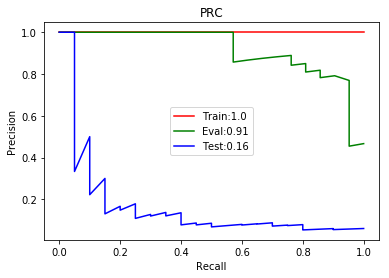

In [0]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.4,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.4,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.4,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

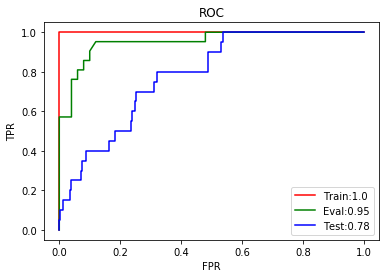

In [0]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.4,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.4,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.4,test_pred)

auroc_train=roc_auc_score(train_y>=0.4,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.4,eval_pred)
auroc_test=roc_auc_score(test_y>=0.4,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

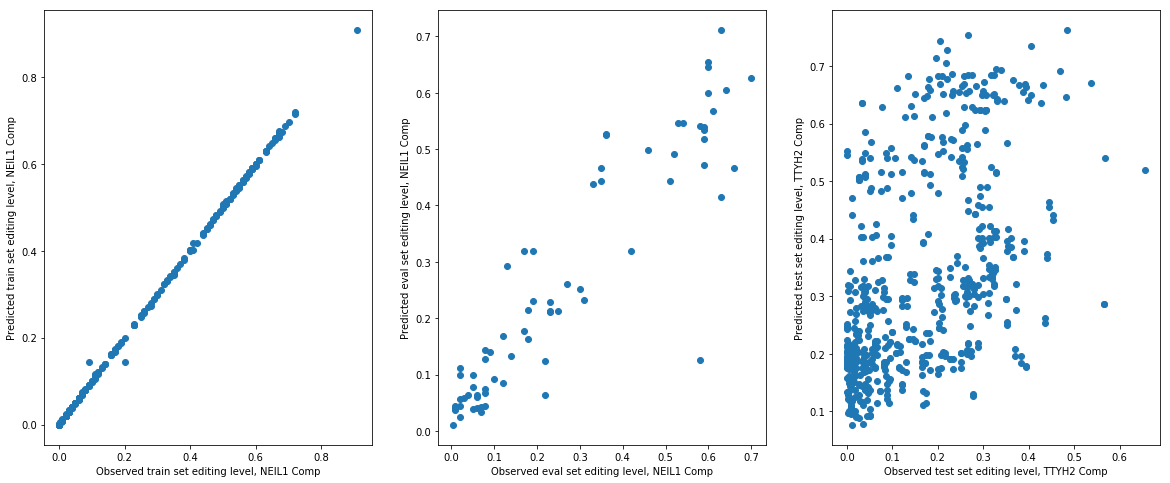

In [0]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, NEIL1 Comp")
plt.ylabel("Predicted train set editing level, NEIL1 Comp")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, NEIL1 Comp")
plt.ylabel("Predicted eval set editing level, NEIL1 Comp")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, TTYH2 Comp")
plt.ylabel("Predicted test set editing level, TTYH2 Comp")
plt.show()

## Train NEIL1, predict AJUBA

In [0]:
test_split=ajuba_comp

In [0]:
train_split.reset_index(inplace=True, drop=True) 
eval_split.reset_index(inplace=True,drop=True)
test_split.reset_index(inplace=True,drop=True)

In [0]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [0]:
#Remove any null features 
train_null=get_all_null_features(train_split)
eval_null=get_all_null_features(eval_split)
test_null=get_all_null_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [0]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
print("\n".join(to_drop))

d1_exist
u3_3prm_cp_internal
d3_exist
d3_5prm_cp_hairpin
d3_length_bulge
u3_length_internal_ecs
u1_length_hairpin
d2_5prm_cp_hairpin
u2_length_internal_es
site_length_hairpin
d3_length_hairpin
site_5prm_cp_hairpin
u1_5prm_cp_hairpin
d2_length_hairpin
u1_length_internal_ecs
u1_5prm_cp_internal
u3_5prm_cp_internal
u1_exist
u2_length_internal_ecs
d3_5prm_cp_bulge
d3_3prm_cp_bulge
u2_exist
d1_5prm_cp_hairpin
d2_length_bulge
d2_3prm_cp_bulge
u3_length_internal_es
d2_5prm_cp_bulge
u1_length_internal_es
d2_exist
u2_3prm_cp_internal
u2_5prm_cp_internal
d1_length_hairpin
u1_3prm_cp_internal


In [0]:
#remove teh features that don't change across isoforms , or are null for all isoforms
for cur_to_drop in to_drop: 
    try:
        train_split=train_split.drop(cur_to_drop,axis=1)
    except: 
        pass
    try:
        eval_split=eval_split.drop(cur_to_drop,axis=1)
    except: 
        pass 
    try:
        test_split=test_split.drop(to_drop,axis=1)
    except: 
        pass

In [0]:
train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)
eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)
test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [0]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

(320, 118)
(320,)
(71, 118)
(71,)
(482, 152)
(482,)


In [0]:
train_cols=set(train_X.columns)
eval_cols=set(eval_X.columns)
test_cols=set(test_X.columns)

In [0]:
common=train_cols.intersection(eval_cols)
common=list(common.intersection(test_cols))
print(common)
train_X=train_X[common]
eval_X=eval_X[common]
test_X=test_X[common]
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

['mut_ref_nt:G', 'u3_distance', 'd2_3prm_cp_internal:C:G', 'site_3prm_cp_internal:G:C', 'site_length_internal_es', 'd2_distance', 'mut_pos', 'u3_struct:H', 'all_stem_length', 'site_prev_nt:U', 'sim_nor_score', 'u1_struct:S', 'u3_length_stem', 'd_count', 'site_next_nt:U', 'u2_length', 'mut_site_dist', 'u1_3prm_cp_bulge:U:A', 'u1_5prm_cp_bulge:C:G', 'd2_struct:I', 'u3_length', 'd2_3prm_cp_internal:G:C', 'mut_ref_nt:C', 'mut_nt:U', 'u2_length_bulge', 'mut_nt:G', 'd2_3prm_cp_internal:U:A', 'u2_struct:B', 'free_energy', 'mut_ref_nt:A', 'mut_struct:S', 'u3_3prm_cp_bulge:C:G', 'd2_5prm_cp_internal:G:C', 'mut_prev_struct:H', 'd1_distance', 'u2_5prm_cp_bulge:C:G', 'u3_length_bulge', 'site_5prm_cp_bulge:C:G', 'site_5prm_cp_internal:G:C', 'site_next_nt:A', 'd3_distance', 'mut_prev_struct:S', 'u_count', 'site_3prm_cp_bulge:A:U', 'u1_length_stem', 'mut_next_struct:I', 'd_all_stem_length', 'mut_nt:C', 'probability_active_conf', 'u2_3prm_cp_bulge:C:G', 'site_3prm_cp_internal:C:G', 'd1_length', 'mut_n

In [0]:
## format matrixes for xgboost 
import xgboost
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [0]:
## set model training parameters 
from __future__ import unicode_literals
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 

#Note: the last metric in your 'eval_metric' list will get optimized 
param['eval_metric'] = ['aucpr','auc','mae','map','rmse']

In [0]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [0]:
num_round = 1000
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[10:19:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[0]	eval-aucpr:0.512329	eval-auc:0.75798	eval-mae:0.207391	eval-map:1	eval-rmse:0.235474	train-aucpr:0.568509	train-auc:0.818235	train-mae:0.208018	train-map:1	train-rmse:0.244401
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[10:19:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[1]	eval-aucpr:0.518559	eval-auc:0.764433	eval-mae:0.159269	eval-map:1	eval-rmse:0.181096	train-aucpr:0.579068	train-auc:0.823184	train-mae:0.152239	train-map:1	train-rmse:0.178769
[10:19:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[2]	eval-aucpr:0.520122	eval-auc:0.767376	eval-mae:0.12835	eval-map:1	eval-rmse:0.148531	train-aucpr:0.581101	train-auc:0.825

[10:19:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[27]	eval-aucpr:0.535488	eval-auc:0.79279	eval-mae:0.061435	eval-map:1	eval-rmse:0.091966	train-aucpr:0.597016	train-auc:0.842721	train-mae:0.011738	train-map:1	train-rmse:0.017407
[10:19:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[28]	eval-aucpr:0.536306	eval-auc:0.792902	eval-mae:0.061451	eval-map:1	eval-rmse:0.092154	train-aucpr:0.597316	train-auc:0.84283	train-mae:0.01128	train-map:1	train-rmse:0.016764
[10:19:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[29]	eval-aucpr:0.536754	eval-auc:0.793185	eval-mae:0.061283	eval-map:1	eval-rmse:0.092026	train-aucpr:0.597364	train-auc:0.842871	train-mae:0.010859	train-map:1	train-rmse:0.016252
[10:19:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra 

[10:19:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[54]	eval-aucpr:0.534527	eval-auc:0.793619	eval-mae:0.058982	eval-map:1	eval-rmse:0.091215	train-aucpr:0.59841	train-auc:0.843449	train-mae:0.004642	train-map:1	train-rmse:0.007998
[10:19:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[55]	eval-aucpr:0.534509	eval-auc:0.793609	eval-mae:0.059056	eval-map:1	eval-rmse:0.091338	train-aucpr:0.598428	train-auc:0.843459	train-mae:0.004472	train-map:1	train-rmse:0.007791
[10:19:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[56]	eval-aucpr:0.534529	eval-auc:0.79368	eval-mae:0.05906	eval-map:1	eval-rmse:0.091328	train-aucpr:0.598435	train-auc:0.843461	train-mae:0.004385	train-map:1	train-rmse:0.007606
[10:19:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra 

[10:19:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[81]	eval-aucpr:0.535783	eval-auc:0.794196	eval-mae:0.058504	eval-map:1	eval-rmse:0.090415	train-aucpr:0.598659	train-auc:0.843556	train-mae:0.001977	train-map:1	train-rmse:0.004993
[10:19:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=6
[82]	eval-aucpr:0.535541	eval-auc:0.794064	eval-mae:0.058529	eval-map:1	eval-rmse:0.09045	train-aucpr:0.598659	train-auc:0.843557	train-mae:0.001911	train-map:1	train-rmse:0.004928
[10:19:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[83]	eval-aucpr:0.535541	eval-auc:0.794064	eval-mae:0.058515	eval-map:1	eval-rmse:0.09044	train-aucpr:0.59866	train-auc:0.843557	train-mae:0.001859	train-map:1	train-rmse:0.004898
[10:19:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra 

In [0]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [0]:
## Correlation values 
from scipy.stats import spearmanr,pearsonr
spearman_train=spearmanr(train_y,train_pred)
spearman_eval=spearmanr(eval_y,eval_pred)
spearman_test=spearmanr(test_y,test_pred)

pearson_train=pearsonr(train_y,train_pred)
pearson_eval=pearsonr(eval_y,eval_pred)
pearson_test=pearsonr(test_y,test_pred)

print("Spearman correlation:")
print("Train:"+str(spearman_train))
print("Eval:"+str(spearman_eval))
print("Test:"+str(spearman_test))
print("\n")
print("Pearson correlation:")
print("Train:"+str(pearson_train))
print("Eval:"+str(pearson_eval))
print("Test:"+str(pearson_test))

Spearman correlation:
Train:SpearmanrResult(correlation=0.9991143884450924, pvalue=0.0)
Eval:SpearmanrResult(correlation=0.9245801072534409, pvalue=1.2497422844928964e-30)
Test:SpearmanrResult(correlation=0.5150419427688033, pvalue=5.220477244649317e-34)


Pearson correlation:
Train:(0.9998017143685966, 0.0)
Eval:(0.9151252696882016, 6.265272892425706e-29)
Test:(0.7626741333550272, 6.953673133302702e-93)


In [0]:
## MAE
from sklearn.metrics import mean_absolute_error
mae_train=mean_absolute_error(train_y,train_pred)
print("MAE Train:"+str(mae_train))

mae_eval=mean_absolute_error(eval_y,eval_pred)
print("MAE Eval:"+str(mae_eval))

mae_test=mean_absolute_error(test_y,test_pred)
print("MAE Test:"+str(mae_test))


MAE Train:0.001605133541618032
MAE Eval:0.05854288624814699
MAE Test:0.2297056793304305


In [0]:
## MAPE
pseudocount=0.01
mape_train=np.mean(np.abs((train_y - train_pred) /(pseudocount+train_y))) * 100
print("MAPE Train:"+str(mape_train)+"%")

mape_eval=np.mean(np.abs((eval_y - eval_pred) /(pseudocount+eval_y))) * 100
print("MAPE Eval:"+str(mape_eval)+"%")

mape_test=np.mean(np.abs((test_y - test_pred) /(pseudocount+test_y))) * 100
print("MAPE Test:"+str(mape_test)+"%")

MAPE Train:1.7565239315946841%
MAPE Eval:36.21515283047393%
MAPE Test:764.1573835423055%


In [0]:
## RMSE
from sklearn.metrics import mean_squared_error
import math 
rmse_train=math.sqrt(mean_squared_error(train_y,train_pred))
print("RMSE Train:"+str(rmse_train))

rmse_eval=math.sqrt(mean_squared_error(eval_y,eval_pred))
print("RMSE Eval:"+str(rmse_eval))

rmse_test=math.sqrt(mean_squared_error(test_y,test_pred))
print("RMSE Test:"+str(rmse_test))


RMSE Train:0.004742424959998238
RMSE Eval:0.09046731775043265
RMSE Test:0.25789468103702606


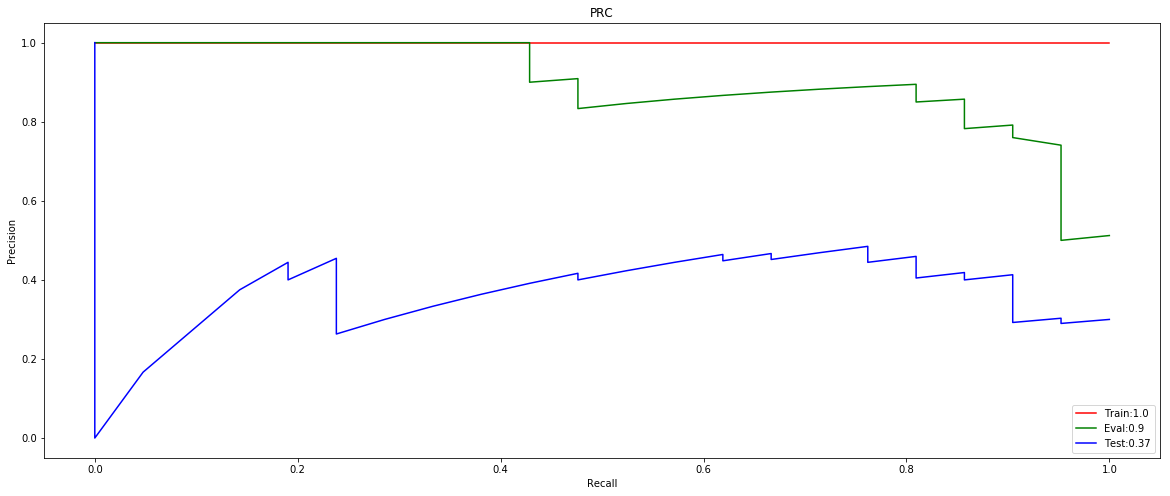

In [0]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.4,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.4,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.2,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

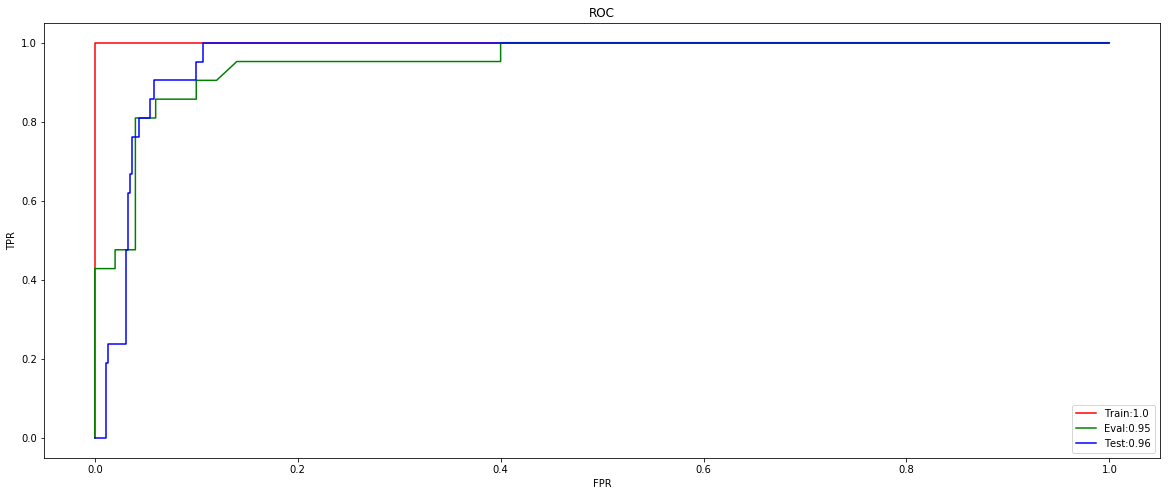

In [0]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.4,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.4,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.2,test_pred)

auroc_train=roc_auc_score(train_y>=0.4,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.4,eval_pred)
auroc_test=roc_auc_score(test_y>=0.2,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

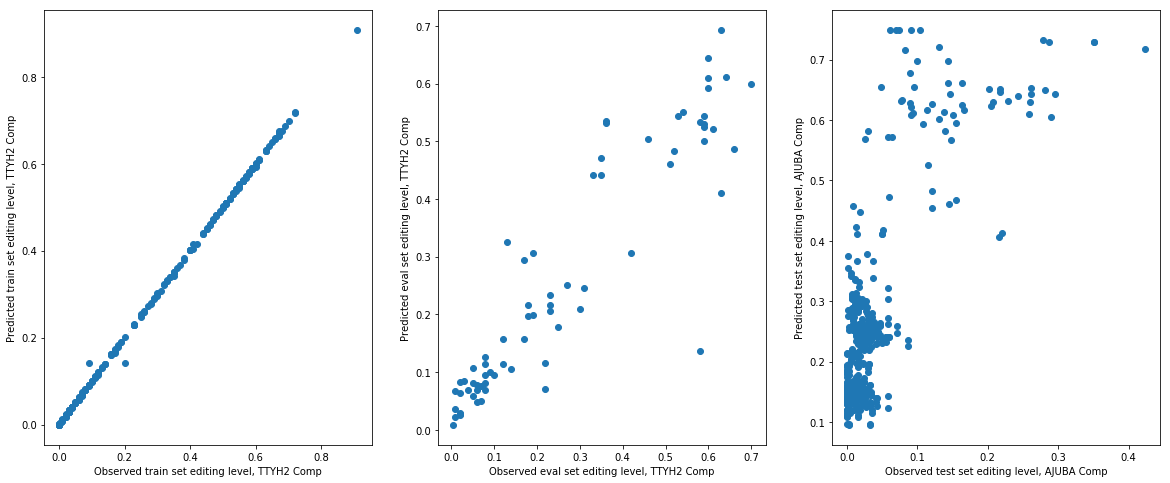

In [0]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, TTYH2 Comp")
plt.ylabel("Predicted train set editing level, TTYH2 Comp")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, TTYH2 Comp")
plt.ylabel("Predicted eval set editing level, TTYH2 Comp")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, AJUBA Comp")
plt.ylabel("Predicted test set editing level, AJUBA Comp")

plt.show()